Load data for I01 (methyleneimmonium)

In [23]:
import xarray as xr

import shnitsel as st
import shnitsel.xarray

xr.set_options(display_expand_coords=False, display_expand_data_vars=False, display_expand_attrs=False, display_expand_data=False)

In [ ]:
# frames = st.read('/nc/data/reparse_2025-12-17/I01_ch2nh2.nc').st.to_frames()
# frames.st.write_shnitsel_file('/nc/data/frames_2026-01-12/I01_ch2nh2_.nc')
# frames

In [25]:
frames = st.read('/nc/data/frames_2026-01-12/I01_ch2nh2.nc')

INFO: Identified the path `/nc/data/frames_2026-01-12/I01_ch2nh2.nc` to be of format `shnitsel`.
INFO: State names already assigned


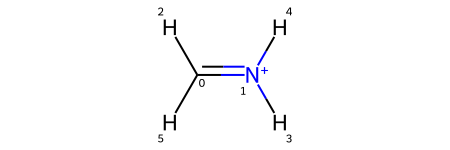

In [28]:
frames.st.default_mol(atomNote=True)

In [29]:
# Pyramidalizations at hops from S2 -> S1
pyr = frames.st.hops([(3, 2)]).atXYZ.st.get_pyramids()
pyr

<xarray.DataArray 'atXYZ' (descriptor: 2, frame: 90)> Size: 720B
-0.1733 -0.3233 0.1189 0.7945 -1.122 ... -0.05929 0.3328 1.129 -0.09403 0.3066
Coordinates: (10)
Dimensions without coordinates: descriptor

We want the pyramidalization angle $\chi_{1,0}^{3,4}$:

In [30]:
pyr1 = pyr.sel(descriptor=(pyr.atoms=={1,0,3,4}))

In [31]:
# Dihedrals at hops S1 -> S0
dih = frames.st.hops([(2, 1)]).atXYZ.st.get_bond_torsions(ang='deg', signed=True)
dih

<xarray.DataArray 'atXYZ' (descriptor: 4, frame: 76)> Size: 1kB
-79.55 -93.1 -50.62 33.02 107.7 -74.64 ... 98.3 -91.83 127.9 -53.85 -100.3
Coordinates: (17)
Dimensions without coordinates: descriptor
Attributes: (5)

Text(0.5, 0.01, 'angle / °')

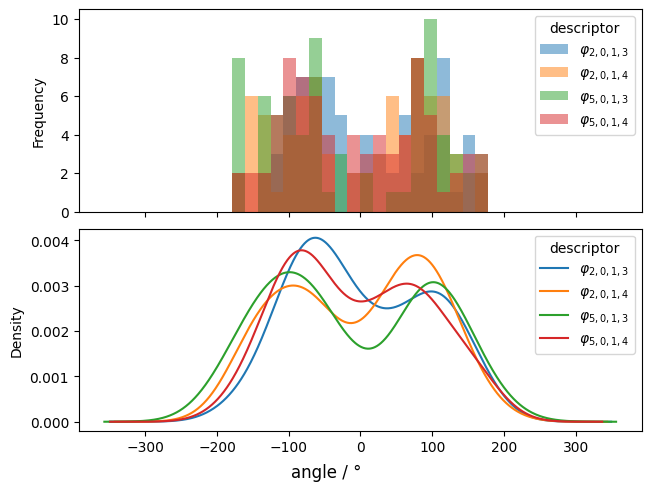

In [32]:
import matplotlib.pyplot as plt

df = dih.swap_dims(descriptor='descriptor_tex').rename(descriptor_tex='descriptor')\
        .transpose(..., 'descriptor').to_pandas()

fig, axs = plt.subplots(2, 1, sharex=True, layout='constrained')
df.iloc[:, :].plot.hist(alpha=.5, ax=axs[0], bins=20)
df.plot.kde(ax=axs[1])
fig.supxlabel('angle / °')
# export CSV

# .plot.hist(color='descriptor')

In [33]:
dih1 = dih.sel(descriptor=dih.atoms=={5, 0, 1, 3})

<Axes: ylabel='Frequency'>

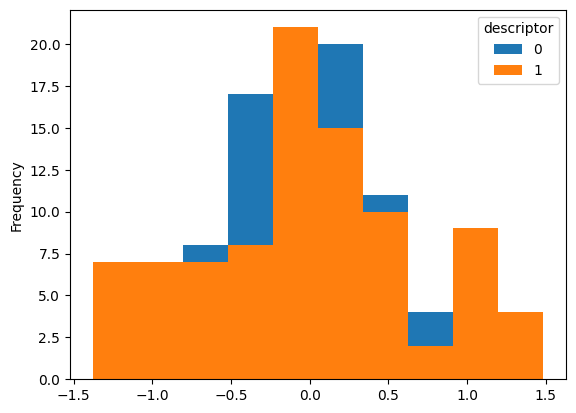

In [37]:
pyr.transpose(..., 'descriptor').to_pandas().plot.hist()